In [25]:
import numpy as np
import pandas as pd
import random
import os
from matplotlib import pyplot as plt

from joblib import dump
from tqdm.notebook import tqdm

import itertools
from IPython.display import clear_output
from sklearn.utils import shuffle
from scipy import signal
from config.default import *

from utils.svm import DCFilter, clip, remove2channel, cut_out, show_me_cut


%matplotlib inline

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
root_path = 'C:/resources/EMG/'
post_fix_source =  '_3s' #'_2s' # '_3s'

classes = settings['classes']
sessions = []
for subject in os.listdir(root_path):
    if subject == 'S010':
        for session in os.listdir(os.path.join(root_path,subject)):
            sessions.append(os.path.join(root_path,subject, session))


print(f"{len(sessions)} sessions found")





4 sessions found


Convert and Clean Data

C:/resources/EMG/S010\session_4\Smile_3s.npy


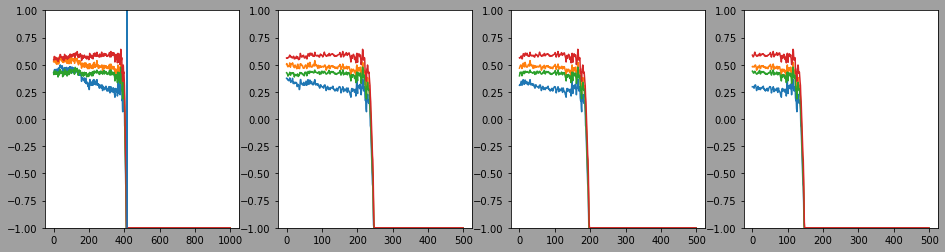

(66, 4, 500)
Saving Smile to C:/resources/EMG/S010\session_4\Smile_1s_cleaned...


In [46]:
post_fix_result = '_1s_cleaned'
for session in sessions:
    for c in classes:
        source_file = os.path.join(session,c+post_fix_source+'.npy')
        good_samples = []
        print(f'Processing {source_file}')
        source = np.load(source_file,allow_pickle=True)
        print(source.shape)
        for sample in source:
            clear_output()
            print(source_file)

            ##############################
            ######  Preprocessing  #######
            ##############################
            if sample.shape[-1] > 1000:
                sample = sample[:,250:-250]         # 3s -> 2s
            sample = remove2channel(sample)     # 6c -# 4c
            sample = clip(sample)               # remove outliers
            sample = cut_out(sample, True)      # cut out the signal


            if 'y' in input("OK").lower():
                for s in sample:
                    good_samples.append(s)

        good_samples = np.array(good_samples)
        print(good_samples.shape)

        target_file = os.path.join(session,c+post_fix_result)
        print(f'Saving {c} to {target_file}...')
        np.save(target_file,good_samples)





Convert only

In [ ]:
post_fix_result = '_1s_new'

draw = True
records = {}
for session in sessions:
    for c in classes:
        #if c == 'Chew':
            source_file = os.path.join(session,c+post_fix_source+'.npy')
            print(f'Processing {source_file}')
            source = np.load(source_file,allow_pickle=True)
            print(source.shape)

            data = np.array([remove2channel(s) for s in source])
            data = np.array([clip(s) for s in data])
            result = np.array([cut_out(s, draw) for s in data])

            result = np.reshape(result, (result.shape[0]* result.shape[1], result.shape[2], result.shape[3]))
            #np.save(os.path.join(session,c+post_fix_result),result)
            break
    break
            